# Load Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import ast
import os
import time
import json
import csv
import librosa
import librosa.display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from pprint import pprint
%matplotlib inline

from functions.functions_features import extract_features_CNN

# Details

In [2]:
# Get cough
list_dataset_name = [
    'coswara', 
    'coughvid', 
    'esc50', 
    'fsdkaggle', 
    'virufy',
    ]

overlap=0 # To avoid overfitting when doing kfold

In [3]:
if not os.path.exists(f'Results_Onset/Features/CNN'):
    os.makedirs(f'Results_Onset/Features/CNN')

# Extract CNN Features

In [4]:
for segment_length in [0.1, 0.2, 0.3, 0.5, 0.7, 1]:
    for dataset_name in list_dataset_name:
        print('\n', dataset_name, segment_length)
        
        df_all = pd.read_csv(f'Results_Onset/Data_Onset/Annotation/data_summary_{dataset_name}_{segment_length}s_onset_label.csv')
        # df_all = df_all[df_all['label']==1].reset_index(drop=True)
        df_all['label_onset'] = df_all['label_onset'].apply(ast.literal_eval)
        df_all['label_event'] = df_all['label_event'].apply(ast.literal_eval)
        df_all = df_all.sample(frac=1).groupby('label').head(1000).reset_index(drop=True)

        total_len = len(df_all)
        results_all = pd.DataFrame()
        path_save = f'Results_Onset/Features/CNN/data_extracted_CNN_{dataset_name}_{segment_length}s_onset_label.csv'

        if os.path.exists(path_save) == False:
        # if os.path.exists(path_save) == True:
        # if True:
            for i in tqdm(range(total_len)):
        
                filepath = df_all['filepath'][i] # Audio path
                dataset = df_all['dataset'][i] # Dataset name
                filename = df_all['filename'][i]
                
                label = df_all['label'][i]
                age = df_all['age'][i]
                gender = df_all['gender'][i]
                status = df_all['status'][i]
                label_onset = df_all['label_onset'][i]
        
                (y, sr) = librosa.load(filepath) # mono=True
                duration = librosa.get_duration(y=y, sr=sr)
        
                segment_samples = int(segment_length * sr)
                step = segment_samples - int(overlap * sr)
        
                results = []
        
                # Set counter to only process the first 10 0 and 1
                counter = {0: 0, 1: 0}
                for j in range(0, len(label_onset)):
                    if counter[label_onset[j]] < 3:
                        start_sample = j * segment_samples
                        segment = y[start_sample:start_sample + segment_samples]
            
                        if len(segment) < segment_samples:
                            padding = np.zeros(segment_samples - len(segment))
                            segment = np.concatenate((segment, padding))

                        mean = np.mean(np.abs(segment))
                        
                        result_row, segment_shape = extract_features_CNN(segment, sr, segment_length)
                        results.append([dataset, filename, filepath, label, age, gender, status, mean, label_onset[j], segment_shape] + result_row)
                        counter[label_onset[j]] += 1

                # print(segment_shape)
                columns = ['dataset', 'filename', 'filepath', 'label', 'age', 'gender', 'status', 'mean_amplitude', 'label_onset', 'input_shape'] + [str(x) for x in range(len(result_row))] #(20, 5)
                results = pd.DataFrame(results, columns=columns)
                results_all = pd.concat([results_all, results])
            
            columns = ['dataset', 'filename', 'filepath', 'label', 'age', 'gender', 'status', 'mean_amplitude', 'label_onset', 'input_shape'] + [str(x) for x in range(len(result_row))]
            results_all = pd.DataFrame(results_all, columns=columns)
            results_all.to_csv(path_save, index=False)
            print(results_all.shape)


coswara 0.1


100%|██████████| 2000/2000 [00:54<00:00, 36.84it/s]


Len: 8759
(8759, 650)
coughvid 0.1


100%|██████████| 2000/2000 [01:16<00:00, 26.12it/s]


Len: 8984
(8984, 650)
esc50 0.1


100%|██████████| 1040/1040 [00:19<00:00, 53.97it/s]


Len: 3240
(3240, 650)
fsdkaggle 0.1


100%|██████████| 1273/1273 [00:26<00:00, 48.52it/s]


Len: 4548
(4548, 650)
virufy 0.1


100%|██████████| 121/121 [00:02<00:00, 42.68it/s]


Len: 726
(726, 650)
coswara 0.2


100%|██████████| 2000/2000 [02:17<00:00, 14.57it/s]


Len: 8757
(8757, 1162)
coughvid 0.2


100%|██████████| 2000/2000 [02:21<00:00, 14.10it/s]


Len: 8975
(8975, 1162)
esc50 0.2


100%|██████████| 1040/1040 [00:39<00:00, 26.24it/s]


Len: 3240
(3240, 1162)
fsdkaggle 0.2


100%|██████████| 1273/1273 [00:59<00:00, 21.51it/s]


Len: 4406
(4406, 1162)
virufy 0.2


100%|██████████| 121/121 [00:05<00:00, 20.55it/s]


Len: 655
(655, 1162)
coswara 0.3


100%|██████████| 2000/2000 [03:52<00:00,  8.59it/s]


Len: 8744
(8744, 1674)
coughvid 0.3


100%|██████████| 2000/2000 [04:14<00:00,  7.85it/s]


Len: 8931
(8931, 1674)
esc50 0.3


100%|██████████| 1040/1040 [03:39<00:00,  4.74it/s]


Len: 3239
(3239, 1674)
fsdkaggle 0.3


100%|██████████| 1273/1273 [05:19<00:00,  3.98it/s]


Len: 4243
(4243, 1674)
virufy 0.3


100%|██████████| 121/121 [00:21<00:00,  5.63it/s]


Len: 618
(618, 1674)
coswara 0.5


100%|██████████| 2000/2000 [16:12<00:00,  2.06it/s]


Len: 8560
(8560, 2826)
coughvid 0.5


100%|██████████| 2000/2000 [07:19<00:00,  4.55it/s]


Len: 8826
(8826, 2826)
esc50 0.5


100%|██████████| 1040/1040 [02:05<00:00,  8.28it/s]


Len: 3218
(3218, 2826)
fsdkaggle 0.5


100%|██████████| 1273/1273 [03:24<00:00,  6.24it/s]


Len: 3937
(3937, 2826)
virufy 0.5


100%|██████████| 121/121 [00:13<00:00,  9.22it/s]


Len: 484
(484, 2826)
coswara 0.7


100%|██████████| 2000/2000 [09:38<00:00,  3.46it/s]


Len: 8158
(8158, 3978)
coughvid 0.7


100%|██████████| 2000/2000 [08:40<00:00,  3.84it/s]


Len: 8640
(8640, 3978)
esc50 0.7


100%|██████████| 1040/1040 [02:34<00:00,  6.72it/s]


Len: 3213
(3213, 3978)
fsdkaggle 0.7


100%|██████████| 1273/1273 [03:19<00:00,  6.37it/s]


Len: 3755
(3755, 3978)
virufy 0.7


100%|██████████| 121/121 [00:12<00:00,  9.39it/s]


Len: 363
(363, 3978)
coswara 1


100%|██████████| 2000/2000 [05:11<00:00,  6.43it/s]


Len: 7327
(7327, 2826)
coughvid 1


100%|██████████| 2000/2000 [05:55<00:00,  5.63it/s]


Len: 8273
(8273, 2826)
esc50 1


100%|██████████| 1040/1040 [01:41<00:00, 10.20it/s]


Len: 3177
(3177, 2826)
fsdkaggle 1


100%|██████████| 1273/1273 [02:09<00:00,  9.86it/s]


Len: 3389
(3389, 2826)
virufy 1


100%|██████████| 121/121 [00:06<00:00, 18.02it/s]


Len: 242
(242, 2826)


# Plot histogram

Window length: 0.1
x_non_cough_non_audio: 11929
x_non_cough_cough_audio: 7132
x_cough_cough_audio: 7196


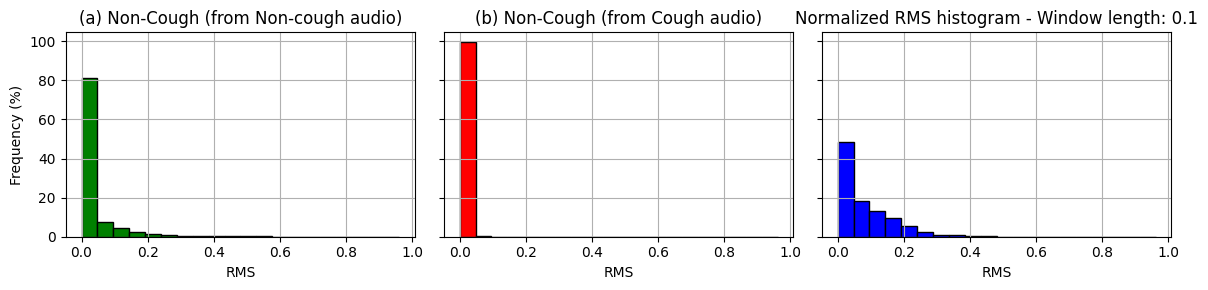

Window length: 0.2
x_non_cough_non_audio: 11918
x_non_cough_cough_audio: 7018
x_cough_cough_audio: 7097


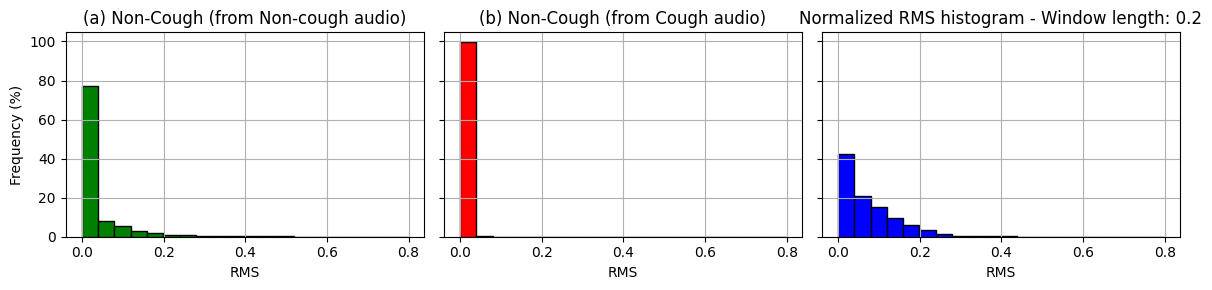

Window length: 0.3
x_non_cough_non_audio: 11862
x_non_cough_cough_audio: 6907
x_cough_cough_audio: 7006


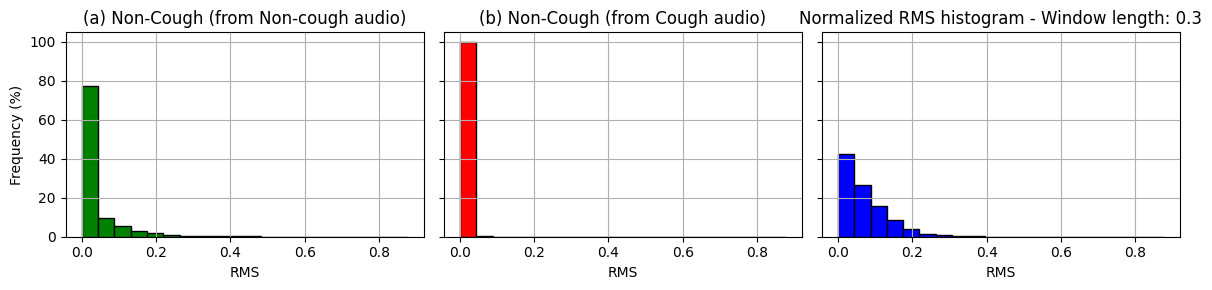

Window length: 0.5
x_non_cough_non_audio: 11666
x_non_cough_cough_audio: 6620
x_cough_cough_audio: 6739


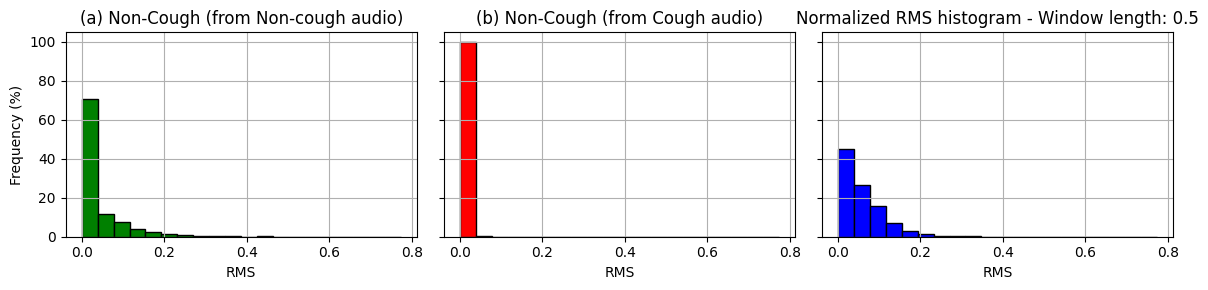

Window length: 0.7


In [ ]:
for segment_length in [0.1, 0.2, 0.3, 0.5, 0.7, 1]:
    print(f'Window length: {segment_length}')
    df_all = pd.DataFrame()
    for dataset_name in list_dataset_name:
        # print(dataset_name)
        df = pd.read_csv(f'Results_Onset/Features/CNN/data_extracted_CNN_{dataset_name}_{segment_length}s_onset_label.csv')
        df_all = pd.concat([df_all, df])
    
    # Extract RMS values
    x_non_cough_non_audio = df_all[(df_all['label'] == 0) & (df_all['label_onset'] == 0)]['mean_amplitude'].tolist()
    x_non_cough_cough_audio = df_all[(df_all['label'] == 1) & (df_all['label_onset'] == 0)]['mean_amplitude'].tolist()
    x_cough_cough_audio = df_all[(df_all['label'] == 1) & (df_all['label_onset'] == 1)]['mean_amplitude'].tolist()
    
    print(f'x_non_cough_non_audio: {len(x_non_cough_non_audio)}')
    print(f'x_non_cough_cough_audio: {len(x_non_cough_cough_audio)}')
    print(f'x_cough_cough_audio: {len(x_cough_cough_audio)}')
    
    # Determine common bin edges
    all_rms_values = x_non_cough_non_audio + x_non_cough_cough_audio + x_cough_cough_audio
    _, bins = np.histogram(all_rms_values, bins=20)
    
    # Create 3 horizontal plots with shared x-axis
    fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharex=True, sharey=True)
    
    axes[0].hist(x_non_cough_non_audio, bins=bins, color='green', edgecolor='black', 
                 weights=[100 / len(x_non_cough_non_audio)] * len(x_non_cough_non_audio))
    axes[0].set_title(f'(a) Non-Cough (from Non-cough audio)')
    axes[0].set_ylabel('Frequency (%)')
    
    axes[1].hist(x_non_cough_cough_audio, bins=bins, color='red', edgecolor='black', 
                 weights=[100 / len(x_non_cough_cough_audio)] * len(x_non_cough_cough_audio))
    axes[1].set_title(f'(b) Non-Cough (from Cough audio)')
    
    axes[2].hist(x_cough_cough_audio, bins=bins, color='blue', edgecolor='black', 
                 weights=[100 / len(x_cough_cough_audio)] * len(x_cough_cough_audio))
    axes[2].set_title(f'(c) Cough (from Cough audio)')
    
    for ax in axes:
        ax.set_xlabel('RMS')
        # ax.set_xscale('log')
        ax.grid(True)
        yticks = ax.get_yticks()
        # ax.set_yticklabels([f'{y * 100:.0f}%' for y in yticks])

    plt.title(f'Normalized RMS histogram - Window length: {segment_length}')
    plt.tight_layout()
    plt.show()